In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import math
from matplotlib import style

In [26]:
data = pd.read_csv("student-mat.csv",sep=";")
# print(data.columns)
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [27]:
predict = "G3"

# Training data data frame without predict(G3)
x = np.array(data.drop([predict], axis=1))

#data to predict
y = np.array(data[predict])

In [28]:
x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

In [29]:
best = 0
for __ in range(500):

# x_train a postion of x(training data ) & y_train is a portion of y data(predicted data) and x & test
# is determined by test_size which is 10% of the training data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

#Building the linear regression model, fitting datat into in that model and measure score against data
    linear = linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    accuracy = linear.score(x_test,y_test)

    if accuracy > best:
        best = accuracy
        with open("studentModel.pickle","wb") as f:
            pickle.dump(linear, f)

In [30]:
# print(f"Accuracy is {accuracy}")

# with open("studentModel.pickle","wb") as f:
#     pickle.dump(linear,f)
'''
saving model with high accuracy in pickle file and loading that 
instead of retraining the model
'''
pickle_in = open("studentModel.pickle", "rb")
linear = pickle.load(pickle_in)

In [31]:
predictions = linear.predict(x_test)

In [32]:
for i in range(len(predictions)):
    print(f"My prediction : {math.floor(predictions[i])} || Test data: {x_test[i]} || Actual result: {y_test[i]}")

My prediction : -1 || Test data: [7 0 2 0 0] || Actual result: 0
My prediction : 11 || Test data: [12 12  2  0  6] || Actual result: 12
My prediction : 8 || Test data: [ 6 10  2  0  4] || Actual result: 10
My prediction : 11 || Test data: [11 12  2  0 10] || Actual result: 13
My prediction : 13 || Test data: [13 13  2  0 14] || Actual result: 14
My prediction : 8 || Test data: [10  9  3  0  4] || Actual result: 9
My prediction : 15 || Test data: [16 15  3  0  9] || Actual result: 16
My prediction : 3 || Test data: [6 5 1 2 0] || Actual result: 0
My prediction : 11 || Test data: [14 12  2  1  0] || Actual result: 12
My prediction : 15 || Test data: [14 16  3  0  0] || Actual result: 16
My prediction : 9 || Test data: [10 10  4  0  0] || Actual result: 10
My prediction : 9 || Test data: [11 10  3  0  4] || Actual result: 11
My prediction : 7 || Test data: [10  8  1  0  6] || Actual result: 11
My prediction : 9 || Test data: [ 9 10  2  0  4] || Actual result: 10
My prediction : 14 || Test

TypeError: 'str' object is not callable

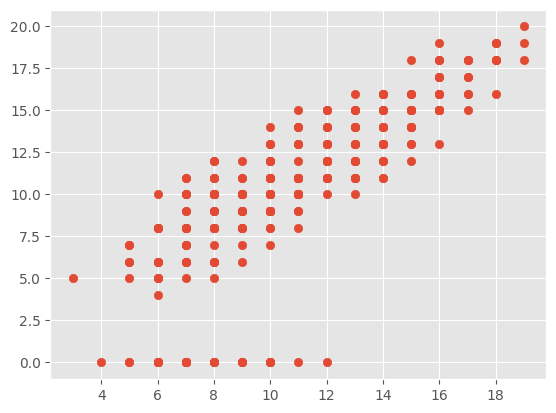

In [42]:
%matplotlib inline
p = "G1"
style.use("ggplot")
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()